In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

## Weight Initialization

In [2]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
# How to use weight initialization:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
# custom weight initialization
init = keras.initializers.VarianceScaling(
    scale=2., 
    mode='fan_avg',                                 
    distribution='uniform'
)
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## Gradient Clipping

In [5]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [6]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Optimizers

### Momentum optimization

In [7]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient

In [8]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad

In [9]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### RMSProp

In [10]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### Adam

In [11]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Load Data

In [12]:
from keras.datasets import fashion_mnist 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
#X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
#y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

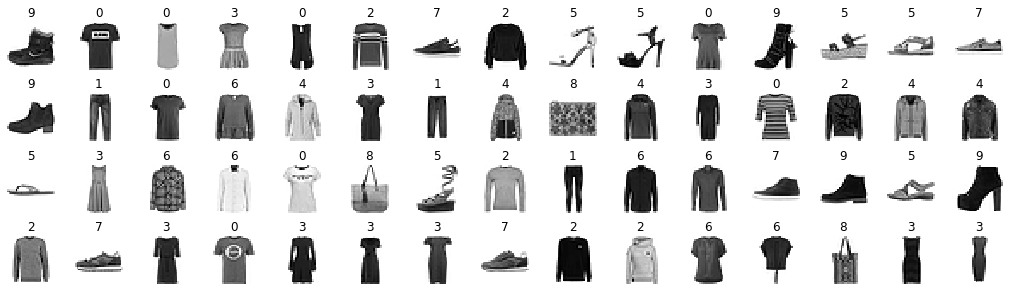

In [13]:
n_rows = 4
n_cols = 15
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)


In [14]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## Learning Rate Scheduling

### Power law scheduling

$ \text{lr} = \frac{ \text{lr}_0 }{ \left(1+ \frac{\text{steps}}{s} \right)^c} $

In Keras: $ c=1$ and $ s = \frac{1}{\text{decay}} $

In [15]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

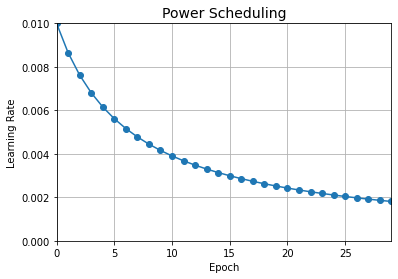

In [16]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
len_X_train = 50000
n_epochs=30
n_steps_per_epoch = len_X_train // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential learning rate Scheduling

$ \text{lr} = \text{lr}_0 \cdot 0.1^{\text{epoch} / s}$

In [17]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [18]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_scheduler = exponential_decay(lr0=0.01, s=20)

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(20, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [20]:
n_epochs = 20

#Learning rate scheduler
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_scheduler)

history = model.fit(
    X_train_scaled, y_train, epochs=n_epochs,
    validation_data=(X_test_scaled, y_test),
    batch_size=256,
    callbacks=[lr_scheduler]
)

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.7563 - val_loss: 0.5152 - val_accuracy: 0.8033
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8685 - val_loss: 0.3968 - val_accuracy: 0.8577
Epoch 3/20
235/235 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8841 - val_loss: 0.4838 - val_accuracy: 0.8355
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8908 - val_loss: 0.4753 - val_accuracy: 0.8328
Epoch 5/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9001 - val_loss: 0.3972 - val_accuracy: 0.8671
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9056 - val_loss: 0.3939 - val_accuracy: 0.8667
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9107 - val_loss: 0.3604 - val_accuracy: 0.8795
Epoch 

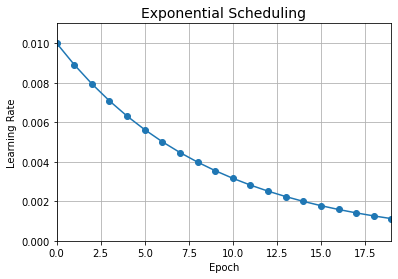

In [21]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [22]:
# reduziere die Learning rate um einen Faktor 0.5, wenn der Validation error nach 5 Epochs nicht gefallen ist
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_test_scaled, y_test),
                    batch_size=256,
                    callbacks=[lr_scheduler])

Epoch 1/20
235/235 [==============================] - 1s 2ms/step - loss: 0.6760 - accuracy: 0.7715 - val_loss: 0.4353 - val_accuracy: 0.8474
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8641 - val_loss: 0.4156 - val_accuracy: 0.8502
Epoch 3/20
235/235 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8755 - val_loss: 0.3884 - val_accuracy: 0.8637
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8852 - val_loss: 0.3891 - val_accuracy: 0.8632
Epoch 5/20
235/235 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8916 - val_loss: 0.3631 - val_accuracy: 0.8738
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8966 - val_loss: 0.3754 - val_accuracy: 0.8679
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.9000 - val_loss: 0.3593 - val_accuracy: 0.8766
Epoch 

<AxesSubplot:>

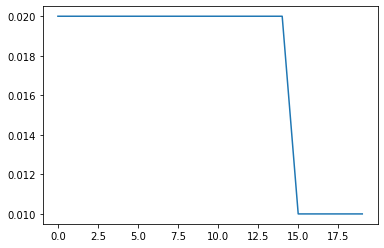

In [23]:
df=pd.DataFrame(history.history)
df['lr'].plot()

## Regularization

### L1 and L2 Regularization

In [24]:
# L2 regularization with a factor 0.1
layer = keras.layers.Dense(
    100, activation="elu",
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01)
)
# or l1(0.1) for L1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both L1 and L2 regularization, with factors 0.1 and 0.01 respectively

## Dropout

In [25]:
# dropout with probability p = 0.2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Übung:

* Trainiere ein neuronales Netzwerk auf dem fashion MNIST Datensatz unter Verwendung sovieler Techniken wie möglich, also
    - L1/L2 Regularization     1e-4
    - Dropout                  p=0.5
    - Gewichte Initialiserung 'lecun_normal'
    - learning rate scheduler
    - Gradient Clipping
    - Stochastic  Gradient Descent mit Momentum und Nesterov's Accelerated Gradient


# ImDB Datensatz

In [26]:
import keras
from keras.models import Sequential
from keras import layers
import numpy as np

In [27]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/mago1/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/mago1/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

# Übung:

* Trainiere drei Modelle mit 3 Layern (Epochs 20, batch_size=256)
    * 1) Normal großes Modell [16, 16, 1]
    * 2) Kleines Modell [4, 4, 1]
    * 3) Großes Modell [128, 128, 1]
    
* Trainiere zwei Modelle mit 3 Layern [16, 16, 1] (Epochs 20, batch_size=256)
    * L2 Regularisierung 1e-4 (nur hidden Layers)
    * Dropout 0.5 (nur hidden Layers)
    
Visualisiere den Verlauf des Test Losses für die verschiedenen Parameter. Vergleiche alles mit dem Normal großen Modell. Was ändert sich und warum?